#### Notes:
    1. Check than Kalman Filter works fine in general mode.
    2. Check that Kalman FIlter solve CPs task fine for syth data.

# Import libs

In [1]:
import sys
sys.path.append("../..")

In [2]:
from models.ProbabilityBased import KalmanFilter
from data.SythData import LinearSteps, SinusoidWaves

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generate Data

In [15]:
# data = LinearSteps(length_data=2000, cps_number=5, white_noise_level="default").get()
data = SinusoidWaves(length_data=2000, cps_number=5, white_noise_level="default").get()

<Axes: xlabel='time'>

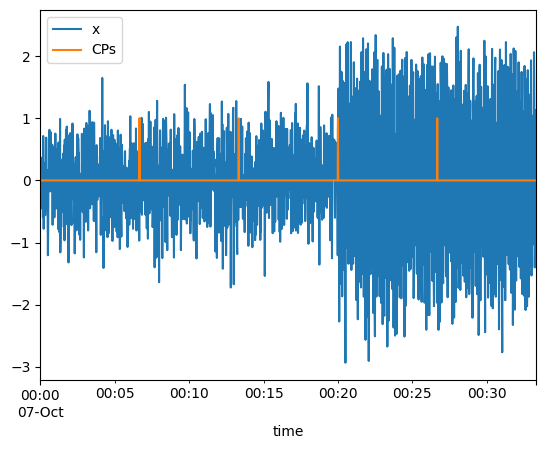

In [16]:
data.plot()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 1999-10-07 00:00:00 to 1999-10-07 00:33:19
Freq: S
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   CPs     2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 46.9 KB


# Init Model

In [32]:
model = KalmanFilter(df=data, target_column="x", window = 100, threshold_quantile_coeff=0.91, is_cps_filter_on=True)

In [33]:
cps_pred = model.predict()

# Plot Results

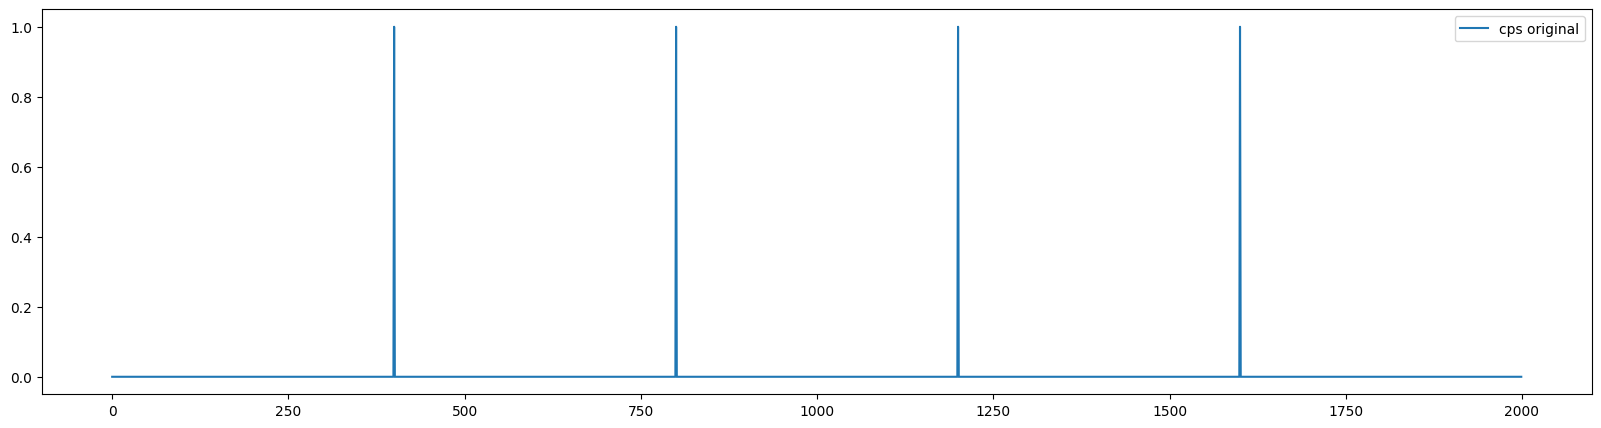

In [34]:
plt.figure(figsize=(20,5))
plt.plot(data["CPs"].values, label='cps original')
plt.legend()

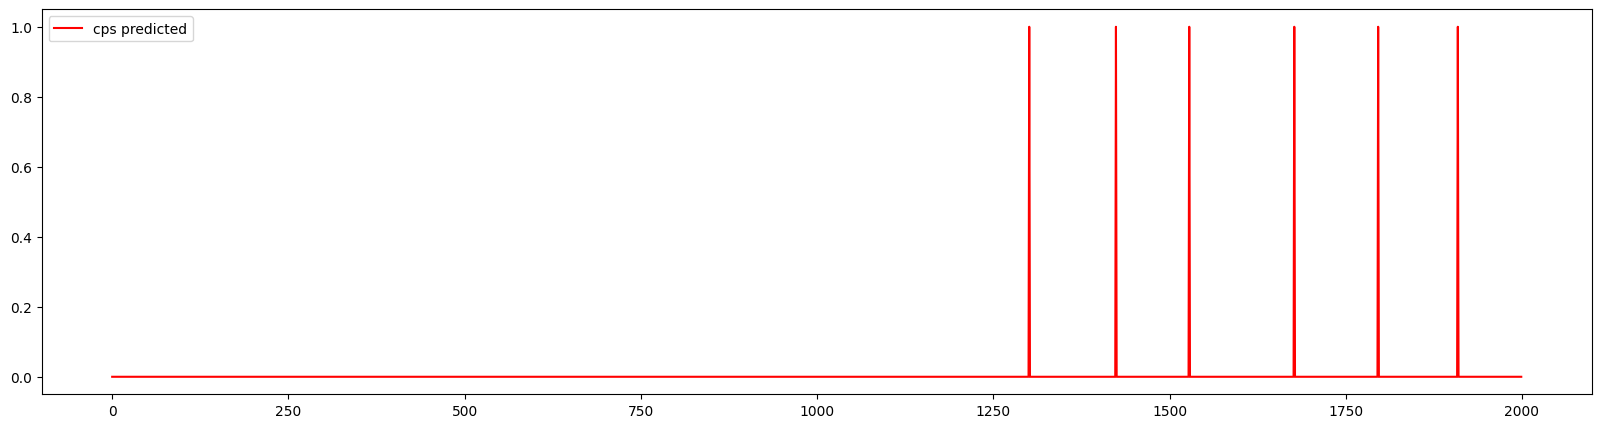

In [35]:
plt.figure(figsize=(20,5))
plt.plot(cps_pred, label='cps predicted', color='red')
plt.legend()

## Plot Forecasted time series

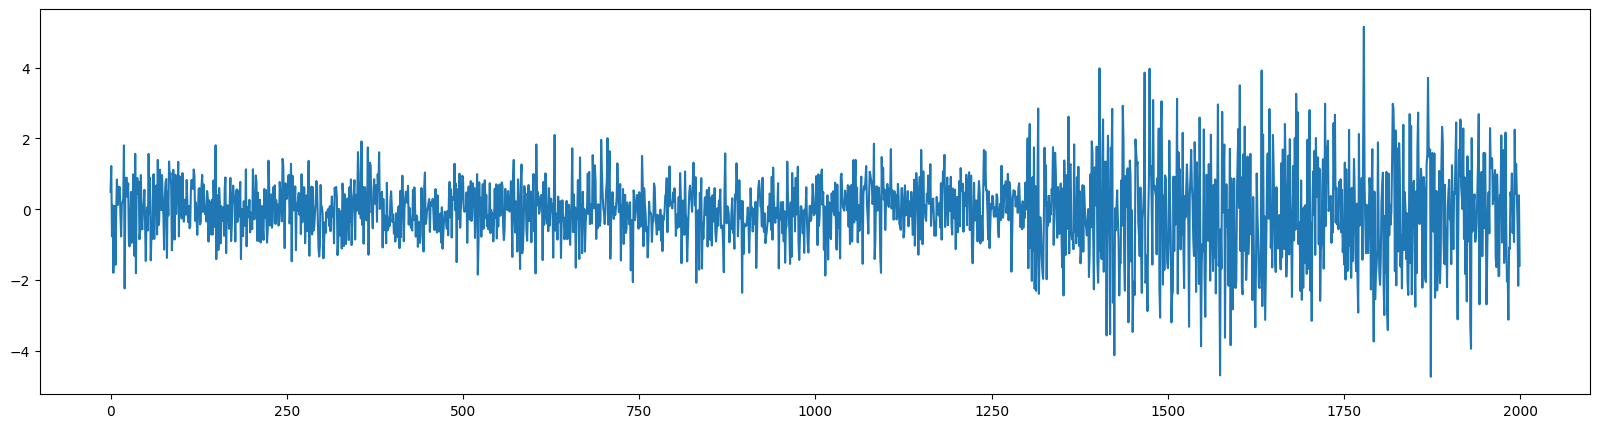

In [36]:
plt.figure(figsize=(20,5))
plt.plot(model.get_full_forecast())

## Plot Original Time-Series

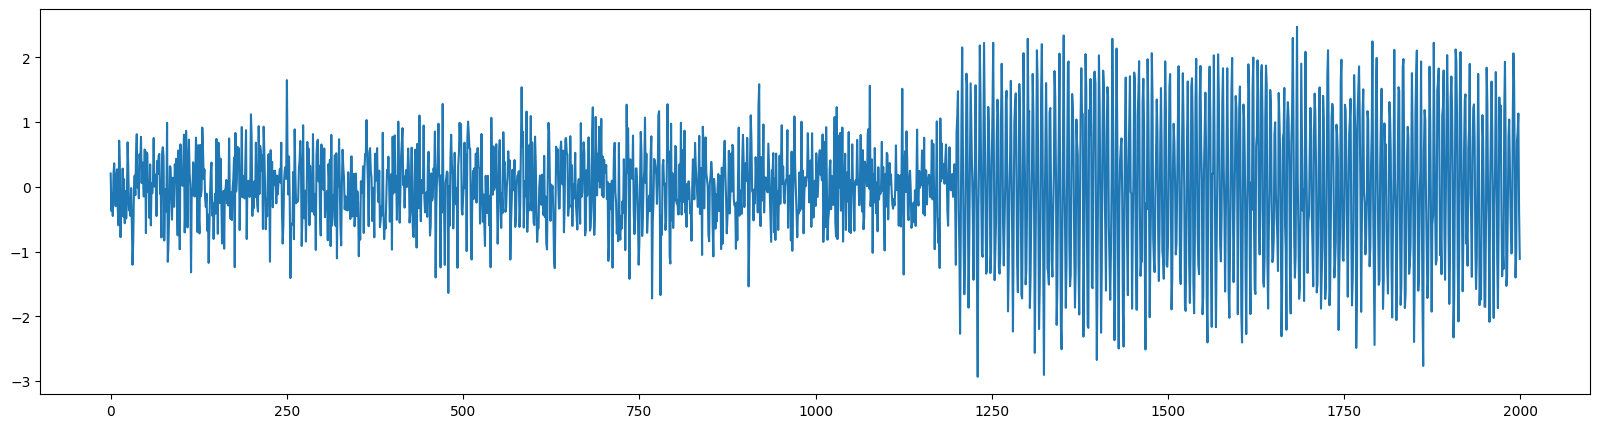

In [37]:
plt.figure(figsize=(20,5))
plt.plot(data['x'].values)

# Residuals

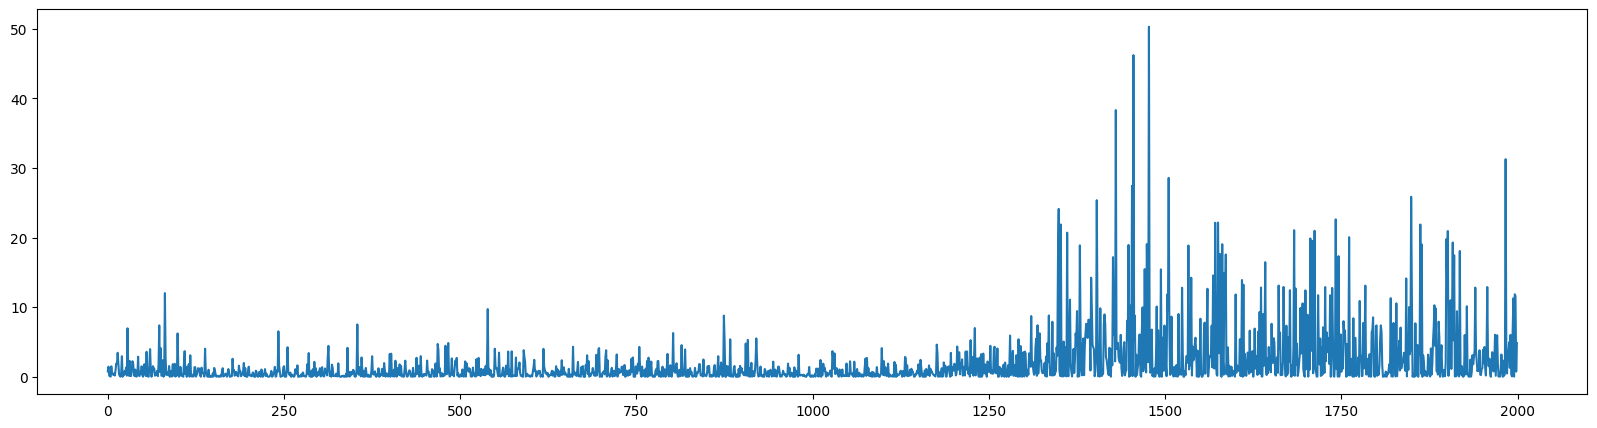

In [38]:
plt.figure(figsize=(20,5))
plt.plot(abs(data['x'].values - model.get_full_forecast())**2)